In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}\n')
print(f'len(np.unique(y_train)) = {len(np.unique(y_train))}')
print(f'len(np.unique(y_test))  = {len(np.unique(y_test))}\n')
print(f'np.max(x_train)         = {np.max(x_train)}')
print(f'np.max(x_test)          = {np.max(x_test)}')

x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)

len(np.unique(y_train)) = 10
len(np.unique(y_test))  = 10

np.max(x_train)         = 255
np.max(x_test)          = 255


In [4]:
#-------------------------
# Scale the features
x_train = x_train.astype('float32')/np.max(x_train)
x_test  = x_test.astype('float32')/np.max(x_test)
#-------------------------
# One-hot encode the labels
n_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, n_classes)
y_test  = utils.to_categorical(y_test, n_classes)

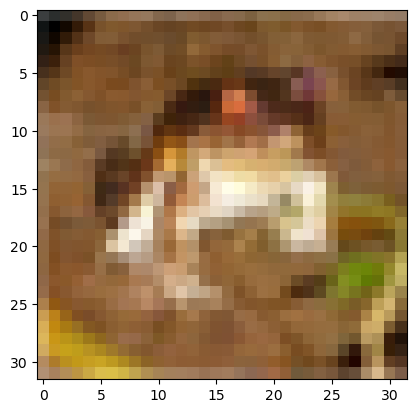

In [5]:
plt.imshow(x_train[0])

# MLP 

In [6]:
# Build the MLP
# The author suggests using functional API instead of Sequential
#   as this will be more flexible in the future
input_layer = layers.Input(shape = x_train[0].shape)
x = layers.Flatten()(input_layer)
x = layers.Dense(units = 200, activation = 'relu')(x)
x = layers.Dense(units = 150, activation = 'relu')(x)
output_layer = layers.Dense(units = n_classes, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model with an optimizer and loss function
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['accuracy']
)

In [9]:
# Train the model by calling the fit method
model.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs     = 10, 
    shuffle    = True
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2929 - loss: 1.9512
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4043 - loss: 1.6597
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4334 - loss: 1.5848
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4550 - loss: 1.5328
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4706 - loss: 1.4838
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4799 - loss: 1.4550
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4901 - loss: 1.4194
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4983 - loss: 1.4029
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5103 - loss: 1.3740
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5189 - loss: 1.3561


In [10]:
# evaluate the model performance on test data
cat_cross_entropy, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4989 - loss: 1.4090


In [11]:
print(f"cat_cross_entropy = {cat_cross_entropy}")
print(f"accuracy          = {accuracy}")

cat_cross_entropy = 1.4167603254318237
accuracy          = 0.4968000054359436


In [12]:
# view some predictions
classes = np.array([
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
])
preds = model.predict(x_test)
#-----
# Note, axis below instructs np.argmax to collapse the array over 
#   the last dimension (the classes dimension)
preds_single  = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


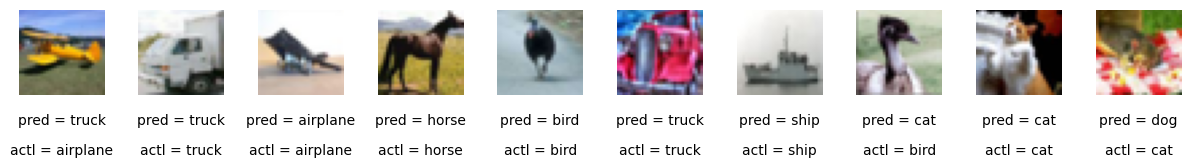

In [13]:
# display predictions of MLP against actual labels
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax  = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, f"pred = {preds_single[idx]}",  fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.70, f"actl = {actual_single[idx]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

# CNN (mock)

In [14]:
input_layer  = layers.Input(shape = x_train[0].shape)
conv_layer_1 = layers.Conv2D(
    filters     = 10, 
    kernel_size = (4,4), 
    strides     = 2, 
    padding     = 'same'
)(input_layer)
conv_layer_2 = layers.Conv2D(
    filters     = 20, 
    kernel_size = (3,3), 
    strides     = 2, 
    padding     = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer  = layers.Dense(units=10, activation='softmax')(flatten_layer)
model         = models.Model(input_layer, output_layer)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 10)     │           490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# First convolutional layer: 10 filters each with shape 4x4x3
#   Including the bias term ==> n = (4x4x3 + 1)x10 = 490
# Output is pixelwise multiplication of filter weights and the 4x4x3 section of image
# strides=2, padding='same' ==> width/height halved to 16
# 10 filters ==> output is batch of tensors each having shape [16, 16, 10]

# Second convolutional layer: 20 filters each with shape 3x3x10
#   Including bias term ==> (3x3x10 + 1)x20 = 1,820
# strides=2, padding='same' ==> width/height halved again to 8
# 20 filters ==> overall output shape (None, 8, 8, 20)

# Flatten layer has no parameters, results in a set of 8x8x20 = 1,280 units

# Final 10-unit Dense layer with softmax activation
# ==> 1,280x10 = 12,810 parameters

# CNN (full)

In [17]:
input_layer  = layers.Input(shape = x_train[0].shape)
#-----
x = layers.Conv2D(
    filters     = 32, 
    kernel_size = 3, 
    strides     = 1, 
    padding     = 'same'
)(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
#-----
x = layers.Conv2D(
    filters     = 32, 
    kernel_size = 3, 
    strides     = 2, 
    padding     = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
#-----
x = layers.Conv2D(
    filters     = 64, 
    kernel_size = 3, 
    strides     = 1, 
    padding     = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
#-----
x = layers.Conv2D(
    filters     = 64, 
    kernel_size = 3, 
    strides     = 2, 
    padding     = 'same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
#-----
x = layers.Flatten()(x)
#-----
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)
#-----
output_layer  = layers.Dense(units=10, activation='softmax')(x)
#-----
model         = models.Model(input_layer, output_layer)

In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [19]:
# Compile the model with an optimizer and loss function
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['accuracy']
)

In [20]:
# Train the model by calling the fit method
model.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs     = 10, 
    shuffle    = True
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 49ms/step - accuracy: 0.3853 - loss: 1.7897
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5716 - loss: 1.2066
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6401 - loss: 1.0357
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6767 - loss: 0.9212
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7025 - loss: 0.8548
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.7192 - loss: 0.8009
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7393 - loss: 0.7471
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7550 - loss: 0.7051
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.7650 - loss: 0.6698
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7740 - loss: 0.6430


In [21]:
# evaluate the model performance on test data
cat_cross_entropy, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6930 - loss: 0.9068


In [22]:
print(f"cat_cross_entropy = {cat_cross_entropy}")
print(f"accuracy          = {accuracy}")

cat_cross_entropy = 0.9078682661056519
accuracy          = 0.6917999982833862


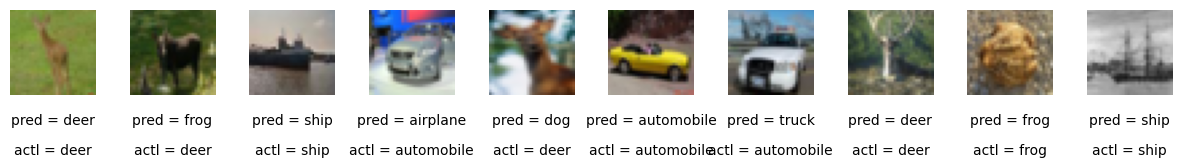

In [23]:
# display predictions of MLP against actual labels
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax  = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, f"pred = {preds_single[idx]}",  fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.70, f"actl = {actual_single[idx]}", fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)